## **IRIS.BARUBELAJAR | KAGGLE COMPETITION BY IRIS COMMUNITY**

### **Import Libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

### **Data Understanding**

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,jabar,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0
5,15659064,790,jateng,Male,37.0,8.0,0.0,2.0,1.0,1.0,2.321693e+08,0
6,15761986,439,Jawa Tengah,Female,32.0,3.0,215828099.7,1.0,1.0,0.0,1.176024e+08,0
7,15713354,597,jabar,Female,22.0,6.0,157757184.8,1.0,1.0,0.0,1.095894e+08,1
8,15593454,678,Jawa Tengah,Female,40.0,4.0,176815734.9,1.0,1.0,NaN,2.582256e+07,0
9,15690134,464,jawabarat,Female,42.0,3.0,133130132.2,1.0,1.0,1.0,2.549892e+08,0


In [4]:
test.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15782993,624,Jawa Timur,Male,51,10,191743610.0,2,1,1,1.986174e+08
1,15640442,717,Jawa Timur,Male,31,4,201565523.7,1,0,0,6.398102e+07
2,15606003,566,Jawa Timur,Female,21,3,0.0,2,1,1,5.634882e+06
3,15672374,672,Jawa Timur,Male,52,8,264163135.8,1,0,0,8.764698e+07
4,15630725,649,Jawa Timur,Female,45,5,144173768.0,1,1,0,2.693794e+08
5,15812338,485,Jawa Tengah,Female,30,7,0.0,1,1,0,1.663634e+08
6,15622470,772,Jawa Tengah,Male,41,10,149216784.1,1,1,1,1.178193e+08
7,15690021,502,Jawa Barat,Female,42,0,205108435.3,1,0,1,4.382546e+07
8,15777855,649,Jawa Timur,Male,45,7,0.0,2,0,1,1.168538e+08
9,15577985,574,Jawa Timur,Female,34,5,174531976.9,2,1,1,2.795855e+07


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       3000 non-null   int64  
 1   credit_score      3000 non-null   int64  
 2   country           3000 non-null   object 
 3   gender            3000 non-null   object 
 4   age               3000 non-null   int64  
 5   tenure            3000 non-null   int64  
 6   balance           3000 non-null   float64
 7   products_number   3000 non-null   int64  
 8   credit_card       3000 non-null   int64  
 9   active_member     3000 non-null   int64  
 10  estimated_salary  3000 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 257.9+ KB


### **Data Preprocessing**

In [7]:
train_prepro = train.copy()
test_prepro = test.copy()

#### Handling Inconsistency

In [8]:
change_country = {
    'jawatimur': 'Jawa Timur',
    'jatim': 'Jawa Timur',
    'Jawa Timur': 'Jawa Timur',
    'jawabarat': 'Jawa Barat',
    'jabar': 'Jawa Barat',
    'Jawa Barat': 'Jawa Barat',
    'jawatengah': 'Jawa Tengah',
    'jateng': 'Jawa Tengah',
    'Jawa Tengah': 'Jawa Tengah',
}

train_prepro['country'] = train_prepro['country'].map(change_country)

print(train_prepro.head())


   customer_id  credit_score      country  gender   age  tenure      balance  \
0     15687492           596   Jawa Barat    Male  32.0     3.0  150268487.1   
1     15736963           623   Jawa Timur    Male  43.0     1.0          0.0   
2     15721730           601  Jawa Tengah  Female  44.0     4.0          0.0   
3     15762134           506   Jawa Barat    Male  59.0     8.0  185140916.0   
4     15648898           560  Jawa Tengah  Female  27.0     NaN  194221253.6   

   products_number  credit_card  active_member  estimated_salary  churn  
0              2.0          0.0            0.0      6.493161e+07      0  
1              2.0          1.0            1.0      2.274471e+08      0  
2              2.0          1.0            0.0      9.099373e+07      0  
3              2.0          1.0            1.0      2.652056e+08      0  
4              1.0          1.0            1.0      1.781762e+08      0  


In [9]:
train_prepro['country'].value_counts()

country
Jawa Timur     3424
Jawa Barat     1749
Jawa Tengah    1672
Name: count, dtype: int64

In [10]:
train_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


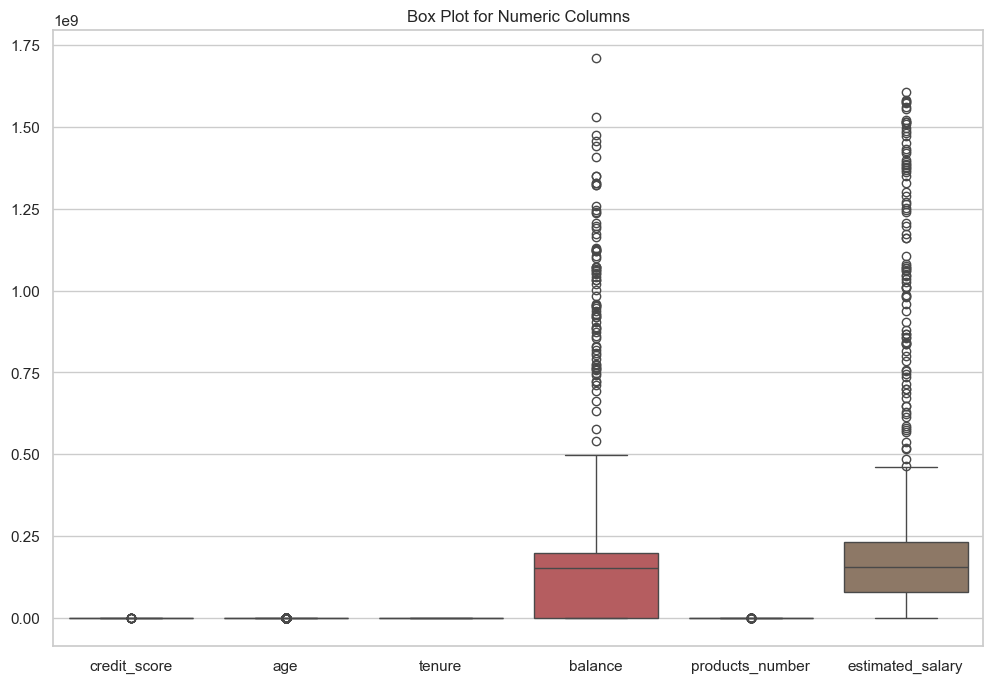

In [11]:
# Box plot for numeric columns
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=train_prepro[numeric_cols])
plt.title('Box Plot for Numeric Columns')
plt.show()

#### Handling Missing Values

In [12]:
train_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


### **Modelling**

In [13]:
train_model = train_prepro.copy()
test_model = test_prepro.copy()

In [14]:
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate features and target variable
X_train = train_model.drop('churn', axis=1)
y_train = train_model['churn']

# Define preprocessing steps
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['country', 'gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model (replace SVC with CatBoostClassifier)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', CatBoostClassifier(iterations=100, depth=8, learning_rate=0.1, loss_function='Logloss'))])

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate the model using F1-score
f1 = f1_score(y_valid, y_pred)
print(f'F1-Score: {f1}')


0:	learn: 0.6466845	total: 135ms	remaining: 13.4s
1:	learn: 0.6049307	total: 145ms	remaining: 7.11s
2:	learn: 0.5699791	total: 150ms	remaining: 4.84s
3:	learn: 0.5439635	total: 154ms	remaining: 3.7s
4:	learn: 0.5205139	total: 160ms	remaining: 3.03s
5:	learn: 0.4994052	total: 164ms	remaining: 2.57s
6:	learn: 0.4828267	total: 169ms	remaining: 2.24s
7:	learn: 0.4668639	total: 174ms	remaining: 2s
8:	learn: 0.4534541	total: 179ms	remaining: 1.81s
9:	learn: 0.4422428	total: 183ms	remaining: 1.65s
10:	learn: 0.4322515	total: 188ms	remaining: 1.52s
11:	learn: 0.4212131	total: 193ms	remaining: 1.42s
12:	learn: 0.4122289	total: 198ms	remaining: 1.33s
13:	learn: 0.4035167	total: 203ms	remaining: 1.25s
14:	learn: 0.3983861	total: 205ms	remaining: 1.16s
15:	learn: 0.3930667	total: 210ms	remaining: 1.1s
16:	learn: 0.3878035	total: 215ms	remaining: 1.05s
17:	learn: 0.3818344	total: 219ms	remaining: 1000ms
18:	learn: 0.3781184	total: 225ms	remaining: 958ms
19:	learn: 0.3738208	total: 229ms	remaining: 

In [15]:
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid to search
param_grid = {
    'classifier__iterations': [100, 200],
    'classifier__depth': [6, 8, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}

# Use F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Predict on the validation set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

f1 = f1_score(y_valid, y_pred)
print(f'F1-Score: {f1}')

0:	learn: 0.6884464	total: 2.92ms	remaining: 289ms
1:	learn: 0.6834974	total: 6.29ms	remaining: 308ms
2:	learn: 0.6789366	total: 8.44ms	remaining: 273ms
3:	learn: 0.6746773	total: 10.4ms	remaining: 250ms
4:	learn: 0.6700623	total: 12.3ms	remaining: 233ms
5:	learn: 0.6661545	total: 14.1ms	remaining: 221ms
6:	learn: 0.6618819	total: 15.9ms	remaining: 212ms
7:	learn: 0.6576779	total: 17.9ms	remaining: 206ms
8:	learn: 0.6535538	total: 20.3ms	remaining: 205ms
9:	learn: 0.6493604	total: 22.5ms	remaining: 202ms
10:	learn: 0.6449879	total: 24.3ms	remaining: 197ms
11:	learn: 0.6408166	total: 26.1ms	remaining: 192ms
12:	learn: 0.6369353	total: 27.2ms	remaining: 182ms
13:	learn: 0.6330989	total: 29ms	remaining: 178ms
14:	learn: 0.6292520	total: 30.8ms	remaining: 175ms
15:	learn: 0.6254382	total: 32.9ms	remaining: 173ms
16:	learn: 0.6216512	total: 34.8ms	remaining: 170ms
17:	learn: 0.6182139	total: 37.4ms	remaining: 170ms
18:	learn: 0.6146723	total: 39.2ms	remaining: 167ms
19:	learn: 0.6112252	tot

In [16]:
y..

SyntaxError: invalid syntax (2197700916.py, line 1)

In [17]:
# Predict on the validation set using the best model
y_pred = best_model.predict(test_model)


pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['customer_id'],pred],axis=1)
datasets.columns=['customer_id','churn']
datasets.to_csv('submissioncat.csv',index=False)

### Sampe sini aja 

In [ ]:
# Separate features and target variable
X_train = train_model.drop('churn', axis=1)
y_train = train_model['churn']

# Define preprocessing steps
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['country', 'gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate the model using F1-score
f1 = f1_score(y_valid, y_pred)
print(f'F1-Score: {f1}')


Accuracy: 0.8157142857142857
F1-Score: 0.3027027027027027


In [ ]:
# Separate features and target variable
X_train = train_model.drop('churn', axis=1)
y_train = train_model['churn']

# Define preprocessing steps
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['country', 'gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model (replace LogisticRegression with SVC)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC())])  # You can adjust SVC parameters here

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate the model using F1-score
f1 = f1_score(y_valid, y_pred)
print(f'F1-Score: {f1}')


Accuracy: 0.8652380952380953
F1-Score: 0.5078260869565219


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVC
param_grid = {'classifier__C': [0.1, 1, 10, 20],
              'classifier__kernel': ['linear', 'rbf'],
              'classifier__gamma': ['scale', 'auto']}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predict on the validation set using the best model
y_pred = grid_search.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')


Best Parameters:  {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Accuracy: 0.8590476190476191
F1-Score: 0.5147540983606557


In [ ]:
# Predict on the validation set using the best model
y_pred = grid_search.predict(test_model)


pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['customer_id'],pred],axis=1)
datasets.columns=['customer_id','churn']
datasets.to_csv('submission3.csv',index=False)